The notebook is checking the performance of https://github.com/unitaryai/detoxify model

The Detoxify model is a NLP multilanguage classificator.

I want to use the model to evaluate performance of my models on a dataset from https://www.kaggle.com/competitions/jigsaw-toxic-comment-classification-challenge/

In [1]:
from detoxify import Detoxify
import pandas as pd

# each model takes in either a string or a list of strings

results = Detoxify('original').predict('example text')

results = Detoxify('unbiased').predict(['example text 1','example text 2'])

results = Detoxify('multilingual').predict(['example text','exemple de texte','texto de ejemplo','testo di esempio','texto de exemplo','örnek metin','пример текста'])

# to specify the device the model will be allocated on (defaults to cpu), accepts any torch.device input

model = Detoxify('original', device='cpu')


print(pd.DataFrame(results).round(5))

c:\Users\maxim\work\ML\text_detoxification\text_detoxification_venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


   toxicity  severe_toxicity  obscene  identity_attack   insult   threat  \
0   0.00020          0.00019  0.00126          0.00032  0.00088  0.00014   
1   0.00056          0.00481  0.03010          0.00553  0.02644  0.00213   
2   0.00063          0.00314  0.02216          0.00347  0.01763  0.00150   
3   0.00099          0.00427  0.03334          0.00541  0.02872  0.00195   
4   0.00061          0.00155  0.01216          0.00184  0.00940  0.00086   
5   0.00059          0.00283  0.02133          0.00313  0.01786  0.00133   
6   0.00053          0.00383  0.02646          0.00403  0.02190  0.00163   

   sexual_explicit  
0          0.00009  
1          0.00104  
2          0.00062  
3          0.00083  
4          0.00036  
5          0.00062  
6          0.00075  


In [2]:
pd.read_csv("../data/interim/filtered.csv")

,Unnamed: 0,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,84835,84835,"someone for sure, but not these idiots.","Somebody does, but not these mooks.",0.630595,0.100000,0.999730,0.003280
1,455358,455358,that's the last time we played poker with some...,That is the last time I play poker with some h...,0.698023,0.073171,0.999726,0.076075
2,133403,133403,because your idiot husband couldn't just wave ...,Because your bozo husband couldn't just wave m...,0.824337,0.052632,0.999724,0.013691
3,551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599
4,265344,265344,"that's why I sent those idiots to watch you. """,That's why I sent those human turnips out to w...,0.680794,0.175439,0.999724,0.007180
...,...,...,...,...,...,...,...,...
577772,476035,476035,Can you tell me what the hell is going on here?,can you tell me what's going on?,0.897083,0.312500,0.500365,0.000044
577773,195415,195415,so does this dog think all of this is real?,"So, the dog thinks this is all real?",0.888280,0.159091,0.500348,0.000322
577774,340901,340901,so does this dog think all of this is real?,So the dog thinks this is all real?,0.913736,0.181818,0.500348,0.000197
577775,213238,213238,That the boss might’ve fucked someone else up ...,the fact that the boss might have hacked someo...,0.815064,0.048193,0.500185,0.000071


In [3]:
comment_classific_data = pd.read_csv("../data/external/Toxic_Comment_Classification_Challenge_test.csv")
toxic_dataset = pd.read_csv("../data/interim/filtered.csv")

results = toxic_dataset[:1000].copy()
results

,Unnamed: 0,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox
0,84835,84835,"someone for sure, but not these idiots.","Somebody does, but not these mooks.",0.630595,0.100000,0.999730,0.003280
1,455358,455358,that's the last time we played poker with some...,That is the last time I play poker with some h...,0.698023,0.073171,0.999726,0.076075
2,133403,133403,because your idiot husband couldn't just wave ...,Because your bozo husband couldn't just wave m...,0.824337,0.052632,0.999724,0.013691
3,551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599
4,265344,265344,"that's why I sent those idiots to watch you. """,That's why I sent those human turnips out to w...,0.680794,0.175439,0.999724,0.007180
...,...,...,...,...,...,...,...,...
995,400615,400615,Stupid students' jokes.,student jokes.,0.772065,0.375000,0.999706,0.000093
996,508792,508792,what a stupid thing to do.,What a douche move.,0.718414,0.259259,0.999706,0.006231
997,60249,60249,he's an idiot for a little girl.,Hoorawed by a little girl.,0.658819,0.181818,0.999706,0.000283
998,175777,175777,"Do you know that asshole, Kim?","you know Kim, right?",0.679087,0.322581,0.999706,0.000052


In [6]:
# results.apply(lambda x: print(x['reference']), axis=1)
# results = pd.read_csv('../data/interim/filtered_with_toxicity.csv')

In [7]:
results["toxicity"] = results.apply(lambda x: model.predict(x['reference'])['toxicity'], axis=1)
results

,Unnamed: 0.1,Unnamed: 0,id,reference,translation,similarity,lenght_diff,ref_tox,trn_tox,toxicity
0,0,84835,84835,"someone for sure, but not these idiots.","Somebody does, but not these mooks.",0.630595,0.100000,0.999730,0.003280,0.942187
1,1,455358,455358,that's the last time we played poker with some...,That is the last time I play poker with some h...,0.698023,0.073171,0.999726,0.076075,0.889607
2,2,133403,133403,because your idiot husband couldn't just wave ...,Because your bozo husband couldn't just wave m...,0.824337,0.052632,0.999724,0.013691,0.983853
3,3,551255,551255,His father would have used a booming voice to ...,his father would have answered with his thunde...,0.729428,0.091954,0.999724,0.004599,0.871848
4,4,265344,265344,"that's why I sent those idiots to watch you. """,That's why I sent those human turnips out to w...,0.680794,0.175439,0.999724,0.007180,0.966815
...,...,...,...,...,...,...,...,...,...,...
995,995,400615,400615,Stupid students' jokes.,student jokes.,0.772065,0.375000,0.999706,0.000093,0.978241
996,996,508792,508792,what a stupid thing to do.,What a douche move.,0.718414,0.259259,0.999706,0.006231,0.959472
997,997,60249,60249,he's an idiot for a little girl.,Hoorawed by a little girl.,0.658819,0.181818,0.999706,0.000283,0.977730
998,998,175777,175777,"Do you know that asshole, Kim?","you know Kim, right?",0.679087,0.322581,0.999706,0.000052,0.986812


In [ ]:
# results.to_csv('/data/interim/filtered_with_toxicity.csv')

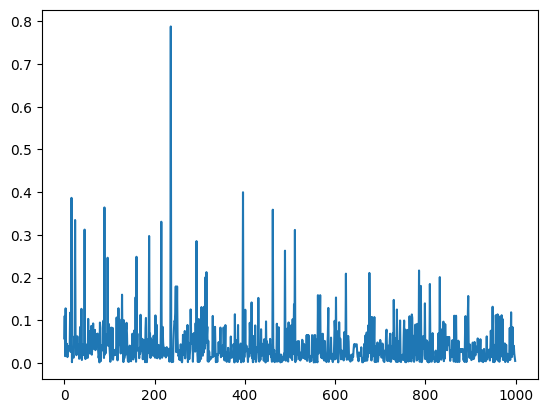

Average error for toxicity metrics from dataset and model prediction is:
 0.04057514951822265
STD of the error for toxicity metrics from dataset and model prediction is:
 0.053257077633421135


In [16]:
import matplotlib.pyplot as plt
import numpy as np

res_diff = results["ref_tox"] - results["toxicity"]
plt.plot(res_diff)
plt.show()

print("Average error for toxicity metrics from dataset and model prediction is:\n", sum(res_diff)/len(res_diff))
print("STD of the error for toxicity metrics from dataset and model prediction is:\n", np.std(res_diff))

So, the model is good enought to use it for model performance evaluation